
- Column1: Device ID
- Column2: accelerometer x
- Column3: accelerometer y
- Column4: accelerometer z
- Column5: gyroscope x
- Column6: gyroscope y
- Column7: gyroscope z
- Column8: magnetometer x
- Column9: magnetometer y
- Column10: magnetometer z
- Column11: Timestamp
- Column12: Activity Label (16 atividades)


In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import utils


In [44]:
window_lenght = 20
loc = []

for i in range (0,15):
    loc.append("FORTH_TRACE_DATASET-master/part" + str(i) + "/part" + str(i) + "dev2.csv")

df = pd.read_csv(loc[0], sep=',', header=None)
array = df.to_numpy()

t_acc = np.sqrt(np.add(np.square(array[:,1]),
                       np.square(array[:,2]),
                       np.square(array[:,3])))

t_gyr = np.sqrt(np.add(np.square(array[:,4]),
                       np.square(array[:,5]),
                       np.square(array[:,6])))

t_mag = np.sqrt(np.add(np.square(array[:,7]),
                       np.square(array[:,8]),
                       np.square(array[:,9])))
array[1:10]

array([[ 2.0000e+00,  2.9591e+00,  9.0436e+00,  3.1400e+00,  4.0588e-01,
         4.6682e+00, -1.0148e-01,  5.8385e-01,  6.8849e-01,  1.2741e+00,
         8.3160e+01,  1.0000e+00],
       [ 2.0000e+00,  2.9465e+00,  9.0545e+00,  3.0799e+00,  2.4230e-01,
         5.5225e+00,  3.4857e-01,  5.6522e-01,  6.7857e-01,  1.2675e+00,
         1.0269e+02,  1.0000e+00],
       [ 2.0000e+00,  2.7898e+00,  9.0528e+00,  3.0726e+00,  4.9858e-01,
         6.3463e+00,  6.1127e-01,  5.6108e-01,  6.5476e-01,  1.2610e+00,
         1.2222e+02,  1.0000e+00],
       [ 2.0000e+00,  2.6924e+00,  9.0377e+00,  2.9794e+00,  6.3197e-01,
         6.6972e+00,  1.0056e+00,  5.7764e-01,  6.9246e-01,  1.2675e+00,
         1.4175e+02,  1.0000e+00],
       [ 2.0000e+00,  2.6317e+00,  9.1825e+00,  2.9302e+00,  8.4115e-01,
         4.9580e+00,  4.8255e-01,  5.7557e-01,  6.7262e-01,  1.2697e+00,
         1.6129e+02,  1.0000e+00],
       [ 2.0000e+00,  2.6199e+00,  9.1707e+00,  2.9549e+00,  7.3496e-01,
         2.2883e+00, -

<Figure size 432x288 with 0 Axes>

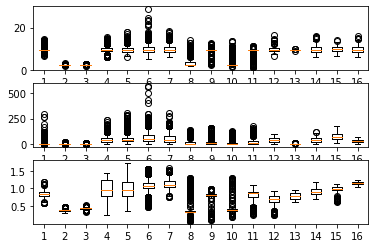

In [19]:


# act1 = t_acc[array[:,-1]==5]

activities = np.arange(1, 17) # nao sei se util
box_acc = [] # TODO ver se dá para fazer isto com np.array
box_gyr = []
box_mag = []
for i in range(1,17):
    act = (array[:,-1]==i)
    #length = np.sum(act)
    box_acc.append(t_acc[act]) # TODO outra forma?
    box_gyr.append(t_gyr[act])
    box_mag.append(t_mag[act])

#box_acc = np.array(box_acc)
plt.figure()
fig, axs = plt.subplots(3)
axs[0].boxplot(box_acc)
axs[1].boxplot(box_gyr)
axs[2].boxplot(box_mag)
plt.show()

In [20]:

# desvio e outliers para cada k = 3, 3.5, 4
d = []
outliersk = [] 

x_density = 5 # percentage

# for c, d in zip(a, b) itera alternadamente cada lista no mesmo loop
for box in ([box_acc, box_gyr, box_mag]):
    for i in range(16):
        q1 = np.quantile(box[:][i], 0.25)
        q3 = np.quantile(box[:][i], 0.75)
        #av = np.average(box[:][i])
        
        iqr = q3-q1
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
    
        outliers = box[:][i][(box[:][i] <= lower_bound) | (box[:][i] >= upper_bound)]
        out_bool = (box[:][i] <= lower_bound) | (box[:][i] >= upper_bound)
        #print('The following are the outliers in the boxplot:{}'.format(outliers))
        box[:][i] = box[:][i][(box[:][i] >= lower_bound) & (box[:][i] <= upper_bound)]
        
        #unique, counts = np.unique(out_bool, return_counts=True)
        #desvios
        counts = np.count_nonzero(out_bool==True)
        d.append((counts/out_bool.size)*100) # TODO se a coluna nao tiver desvios
        
        zscore = stats.zscore(box[:][i], axis=0, ddof=0, nan_policy='propagate')
        outliersk.append(box[:][i][(zscore <= -3) | (zscore >= 3)])
        #print('The following are the outliers from the z-score test: {}'.format(outliersk[:][i]))
        
        #iterar para cada coluna
        centroids, cluster = utils.k_means(box[:][i], 3)


In [21]:
t_out, td = utils.get_outliers(t_acc)
p = t_out.shape[0]
acc_out = utils.inject_outliers(10, 4, t_out, p)
# os valores mudam mesmo apesar do teste as array dar igual

In [22]:
coef = []
for vec in box_acc:
    
    n = vec.size    
    ran = np.ptp(vec)
    test = np.random.rand(n)*ran
    #print(np.reshape(test[:n], (-1,1)))
    #print(np.reshape(vec[:n], (-1,1)).shape)
    test = np.append(test[:n], test[:n]).reshape(-1, 2)
    coef.append(utils.fit_linear(test, vec, n))



In [23]:

for i in range(16):
    stats.kstest(box_acc[:][i], 'norm') # if follows a gaussian


In [26]:


X_train, X_test, y_train, y_test = train_test_split(test, vec, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
var = pca.explained_variance_ratio_
print(var)

[0.55218625 0.44781375]
